# Neural Network

# Importing

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('students_adaptability_level.csv')
data.head()



2024-08-09 22:35:27.551206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,ID,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,2,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,3,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,4,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,5,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# Data Preprocessing

In [7]:
# Encode categorical variables (end product is a table containing only numbers)
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Split the data into features and target
X = data.drop(['ID','Adaptivity Level'], axis=1)
y = data['Adaptivity Level']


In [ ]:
# My model

In [8]:
#LLM prompt: COmponents of a neural network & sample
# Standardize numerical features (all my values are now numerical because of the encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting my data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building my model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compiling my model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training my model
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32)

# Evaluating my model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


Epoch 1/150
25/25 [==============================] - 2s 24ms/step - loss: 0.7324 - accuracy: 0.6524 - val_loss: 0.7366 - val_accuracy: 0.6321
Epoch 2/150
25/25 [==============================] - 0s 19ms/step - loss: 0.5707 - accuracy: 0.7354 - val_loss: 0.6969 - val_accuracy: 0.7254
Epoch 3/150
25/25 [==============================] - 0s 18ms/step - loss: 0.4861 - accuracy: 0.8003 - val_loss: 0.6234 - val_accuracy: 0.7150
Epoch 4/150
25/25 [==============================] - 0s 20ms/step - loss: 0.4141 - accuracy: 0.8262 - val_loss: 0.5279 - val_accuracy: 0.7461
Epoch 5/150
25/25 [==============================] - 0s 17ms/step - loss: 0.3795 - accuracy: 0.8508 - val_loss: 0.5023 - val_accuracy: 0.7150
Epoch 6/150
25/25 [==============================] - 0s 17ms/step - loss: 0.3481 - accuracy: 0.8547 - val_loss: 0.4662 - val_accuracy: 0.8031
Epoch 7/150
25/25 [==============================] - 0s 17ms/step - loss: 0.3064 - accuracy: 0.8755 - val_loss: 0.4286 - val_accuracy: 0.8238
Epoch 

8/8 [==============================] - 0s 8ms/step


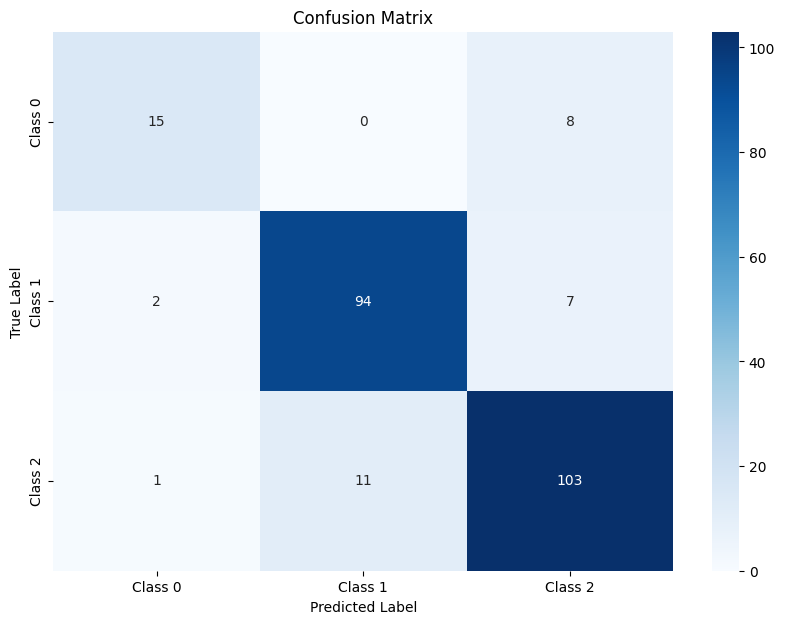

              precision    recall  f1-score   support

     Class 0       0.83      0.65      0.73        23
     Class 1       0.90      0.91      0.90       103
     Class 2       0.87      0.90      0.88       115

    accuracy                           0.88       241
   macro avg       0.87      0.82      0.84       241
weighted avg       0.88      0.88      0.88       241



In [11]:
#LLM prompt: How to use a confusion matrix
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converting the probabilities gotten into the class labels

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
#there are 3 classes/ categories in our target variable
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show() 
